<a href="https://colab.research.google.com/github/akarshpyr/Akarshcodes12/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/data_cleaned.csv')

In [3]:
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=3)

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [121]:
scal = StandardScaler()

In [122]:
x_train_scaled = scal.fit_transform(x_train)
x_test_scaled = scal.transform(x_test)

In [123]:
col = x_train.columns

In [124]:
col

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [125]:
x_train_scaled

array([[-5.04129284e-01, -5.25545461e-01, -5.53244670e-01, ...,
        -4.70710768e-01, -2.79024499e-01,  5.82910753e-01],
       [ 3.48268720e-03,  4.26712712e-01,  1.80751854e+00, ...,
        -4.70710768e-01, -2.79024499e-01,  5.82910753e-01],
       [-4.28356324e-01,  7.63199698e-01, -5.53244670e-01, ...,
        -4.70710768e-01, -2.79024499e-01,  5.82910753e-01],
       ...,
       [ 7.84011030e-01,  4.95861914e-04,  1.80751854e+00, ...,
         2.12444683e+00, -2.79024499e-01, -1.71552848e+00],
       [ 2.62814336e-02, -4.15065567e-01, -5.53244670e-01, ...,
        -4.70710768e-01, -2.79024499e-01,  5.82910753e-01],
       [ 1.54174063e+00, -4.59369687e-01, -5.53244670e-01, ...,
        -4.70710768e-01, -2.79024499e-01,  5.82910753e-01]])

In [126]:
x_train_scal = pd.DataFrame(x_train_scaled,columns=col)
x_test_scal = pd.DataFrame(x_test_scaled,columns=col)

In [127]:
x_train_scal

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.504129,-0.525545,-0.553245,-0.508513,0.886059,1.377561,-1.377561,0.685084,-0.570554,-0.162355,...,0.565611,-0.400186,-0.317343,-0.05675,-0.05675,-0.080387,0.0,-0.470711,-0.279024,0.582911
1,0.003483,0.426713,1.807519,-0.508513,-1.128593,-0.725921,0.725921,0.685084,-0.570554,-0.162355,...,0.565611,-0.400186,-0.317343,-0.05675,-0.05675,-0.080387,0.0,-0.470711,-0.279024,0.582911
2,-0.428356,0.763200,-0.553245,1.966517,-1.128593,1.377561,-1.377561,-1.459676,1.752682,-0.162355,...,-1.768001,-0.400186,3.151162,-0.05675,-0.05675,-0.080387,0.0,-0.470711,-0.279024,0.582911
3,-0.807221,-0.523302,-0.553245,-0.508513,0.886059,-0.725921,0.725921,0.685084,-0.570554,-0.162355,...,0.565611,-0.400186,-0.317343,-0.05675,-0.05675,-0.080387,0.0,-0.470711,-0.279024,0.582911
4,-1.337632,-0.442732,-0.553245,-0.508513,0.886059,-0.725921,0.725921,-1.459676,1.752682,-0.162355,...,0.565611,-0.400186,-0.317343,-0.05675,-0.05675,-0.080387,0.0,2.124447,-0.279024,-1.715528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,-0.882994,-0.370667,-0.553245,-0.508513,0.886059,1.377561,-1.377561,0.685084,-0.570554,-0.162355,...,-1.768001,2.498837,-0.317343,-0.05675,-0.05675,-0.080387,0.0,2.124447,-0.279024,-1.715528
619,-1.640724,-0.222146,-0.553245,-0.508513,0.886059,1.377561,-1.377561,-1.459676,-0.570554,-0.162355,...,-1.768001,2.498837,-0.317343,-0.05675,-0.05675,-0.080387,0.0,-0.470711,-0.279024,0.582911
620,0.784011,0.000496,1.807519,-0.508513,-1.128593,-0.725921,0.725921,0.685084,-0.570554,-0.162355,...,0.565611,-0.400186,-0.317343,-0.05675,-0.05675,-0.080387,0.0,2.124447,-0.279024,-1.715528
621,0.026281,-0.415066,-0.553245,-0.508513,0.886059,1.377561,-1.377561,0.685084,-0.570554,-0.162355,...,0.565611,-0.400186,-0.317343,-0.05675,-0.05675,-0.080387,0.0,-0.470711,-0.279024,0.582911


In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
model_Knn = KNeighborsClassifier(n_neighbors=17)

In [142]:
model_Knn.fit(x_train_scal,y_train)

KNeighborsClassifier(n_neighbors=17)

In [143]:
y_pred_test = model_Knn.predict(x_test_scal)

In [144]:
np.mean(y_test==y_pred_test)

0.832089552238806

In [145]:
from sklearn.metrics import classification_report,f1_score

In [146]:
print(f1_score(y_test,y_pred_test))

0.7643979057591622


In [147]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       165
           1       0.83      0.71      0.76       103

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [37]:
scale = MinMaxScaler()

In [38]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [39]:
col = x_train.columns

In [40]:
col

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [41]:
x_train_scaled

array([[0.67328474, 0.15085515, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37170143, 0.01854277, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37170143, 0.01541158, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.22090978, 0.44409922, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.45966323, 0.1036443 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35285248, 0.03142511, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [42]:
x_train_scal = pd.DataFrame(x_train_scaled,columns=col)
x_test_scal = pd.DataFrame(x_test_scaled,columns=col)

In [43]:
x_train_scal

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.673285,0.150855,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.371701,0.018543,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.371701,0.015412,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.258608,0.015330,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.208344,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.585323,0.014151,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
619,0.924604,0.015176,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
620,0.220910,0.444099,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
621,0.459663,0.103644,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
model_Knn2 = KNeighborsClassifier(n_neighbors=5)

In [113]:
model_Knn2.fit(x_train_scal,y_train)

KNeighborsClassifier()

In [114]:
y_pred_test = model_Knn.predict(x_test_scal)

In [115]:
np.mean(y_test==y_pred_test)

0.7947761194029851

In [116]:
from sklearn.metrics import classification_report,f1_score

In [117]:
print(f1_score(y_test,y_pred_test))

0.6745562130177515


In [118]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       165
           1       0.86      0.55      0.67       103

    accuracy                           0.79       268
   macro avg       0.82      0.75      0.76       268
weighted avg       0.81      0.79      0.78       268



In [137]:
def elbow(k):
  test_error=[]
  for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_scal,y_train)
    y_pred_tes = clf.predict(x_test_scal)
    tmp=f1_score(y_pred_tes,y_test)
    error = 1-tmp 
    test_error.append(error)
  return test_error

In [138]:
k = range(3,20,2)

In [139]:
test_err = elbow(k)

Text(0, 0.5, 'error')

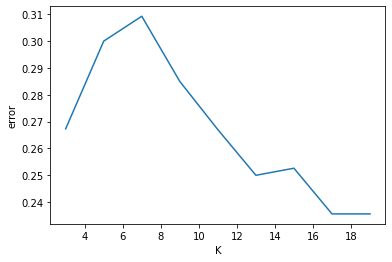

In [140]:
plt.plot(k,test_err)
plt.xlabel('K')
plt.ylabel('error')